# Development rig

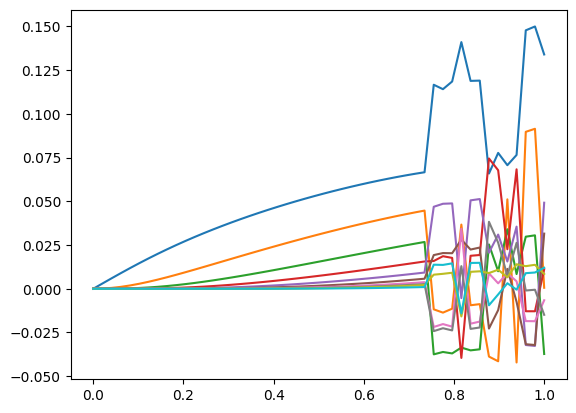

In [54]:
N,L_d=10,16
import sys

# setting path
sys.path.append('/home/mike/Documents/github/modwaves')

import matplotlib.pyplot as plt
import numpy as np

from scipy.interpolate import make_interp_spline as mis

from waterwaves1.wave import wave1
from waterwaves1.packing import unpack1,pack1
from waterwaves1.fourier import IEj
from waterwaves1.display import eta

def wave_base(hmax,Nb):
    H=np.linspace(0,hmax,Nb)
    SOL=[wave1(N,h*Hmx_d*d,d=d,scaler=s) for h in H]
    return H,SOL

def check_SOL(SOL):
    return np.all(extract(SOL,'success'))

def extract(SOL,attr):
    return np.array([getattr(sol,attr) for sol in SOL])

def H_max(L_d):
    return (0.141063*L_d+0.0095721*L_d**2+0.0077829*L_d**3)/(1+0.0788340*L_d+0.0317567*L_d**2+0.0093407*L_d**3)
    
def dspEk(N,L_d,fs=lambda x:None):
    Hmx_d=(0.141063*L_d+0.0095721*L_d**2+0.0077829*L_d**3)/(1+0.0788340*L_d+0.0317567*L_d**2+0.0093407*L_d**3)
    d=2*np.pi/L_d
    ha=np.linspace(0,1)
    SOL=[wave1(N,h*Hmx_d*d,d=d,scaler=s,A0=fs(h)) for h in ha]
    SOLx=extract(SOL,'x')
    plt.plot(ha,SOLx.T[:-2].T)

dspEk(10,16)

True


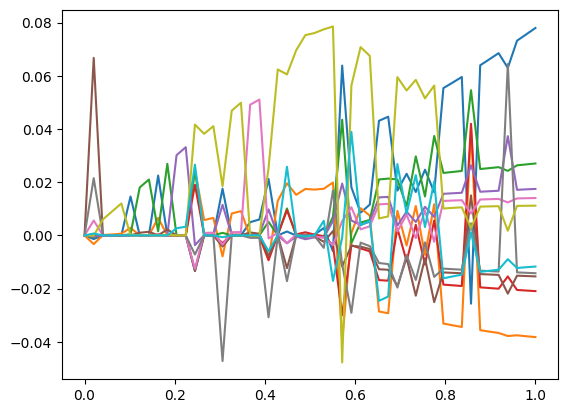

In [63]:
H,SOL=wave_base(0.2,3)
print(check_SOL(SOL))
SOLx=extract(SOL,'x')
fs=mis(H,SOLx,k=min(len(H)-1,3))
dspEk(10,16,fs)

In [2]:
Hmx_d=(0.141063*L_d+0.0095721*L_d**2+0.0077829*L_d**3)/(1+0.0788340*L_d+0.0317567*L_d**2+0.0093407*L_d**3)
d=2*np.pi/L_d
s=d*(1+0.0*Hmx_d)
X=np.linspace(0,np.pi,200)

False


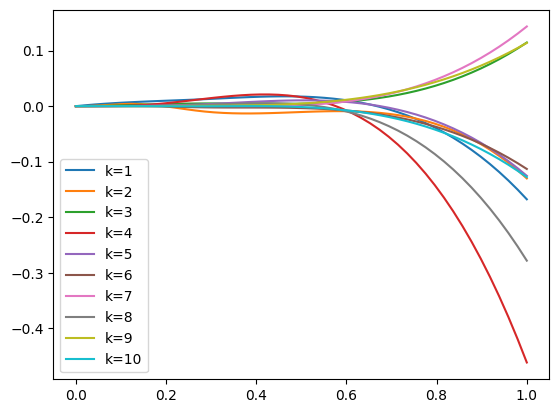

In [12]:
H,SOL=wave_base(-8,-2)
if check_base(SOL):
    SOLX=xtract(SOL)
    fs=mis(H,SOLX,k=min(len(H)-1,3))
    Hadd=np.linspace(max(H),0.6,4)[1:]
    SOLadd=[wave1(N,h*Hmx_d*d,d=d,scaler=s,A0=fs(h)) for h in Hadd]
    print(check_base(SOLadd))
    H+=list(Hadd)
    SOLX+=xtract(SOLadd)
    fs=mis(H,SOLX,k=min(len(H)-1,3))
    Hg=np.linspace(0,1)
    plt.plot(Hg,fs(Hg).T[:-2].T,label=[f'k={k+1}' for k in range(10)])
    plt.legend()
    plt.show()
else:
    print('Base invalid')

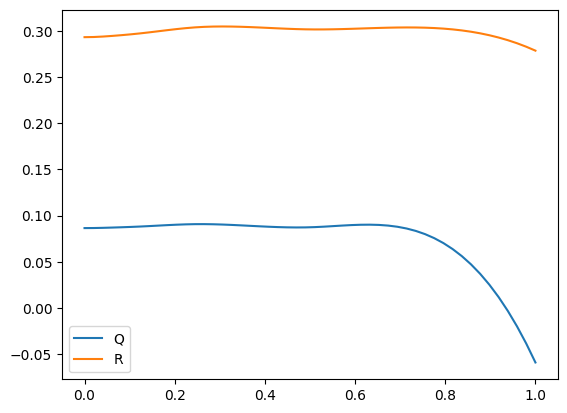

In [6]:
plt.plot(Hg,fs(Hg).T[-2:].T,label=['Q','R'])
plt.legend()
plt.show()

h=0.5 fail


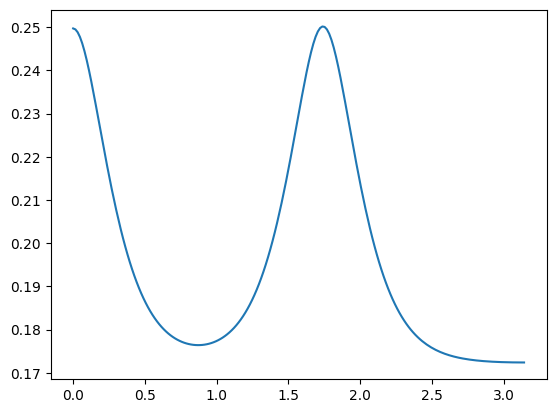

In [59]:
h=0.5
solx=fs(h)
Np=50
A0=np.insert(solx,-2,np.zeros(Np))
solNp=wave1(N+Np,h*Hmx_d*d,d=d,scaler=s,A0=A0)
eta(X,d,solNp,f'h={h}')

In [ ]:
fs